## 20200924作业

### 赵梦璇 22019207062

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
myData=pd.read_csv('C:/Users/iris zhao/Desktop/python_work/2020python_class/20200922作业/WorldIndex.csv')
myData.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [3]:
myData=myData.dropna()
len(myData)

164

### 人均寿命数据的直方图

Text(0.5, 0, 'Life_expectancy')

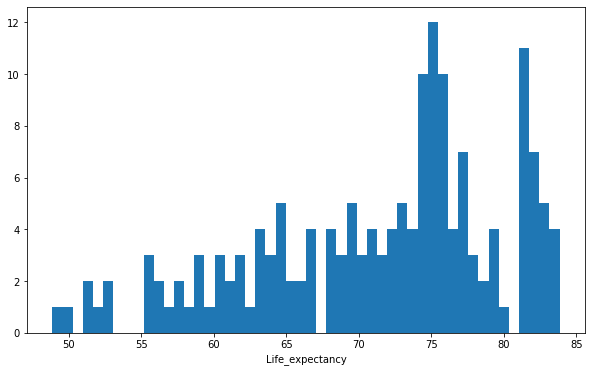

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(myData['Life_expectancy'], bins=50)
ax.set_xlabel("Life_expectancy")

### 人均GDP直方图

Text(0.5, 0, 'GDP_per_capita')

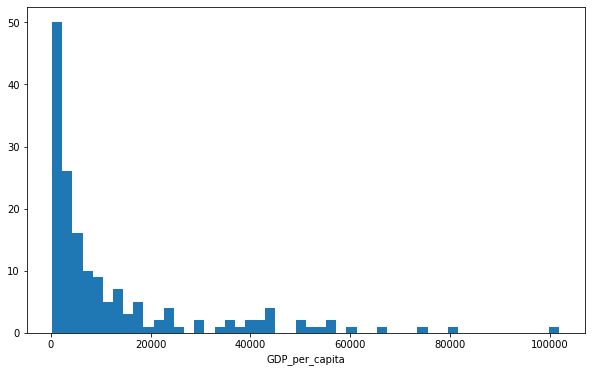

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(myData['GDP_per_capita'], bins=50)
ax.set_xlabel("GDP_per_capita")

### 人均寿命箱线图

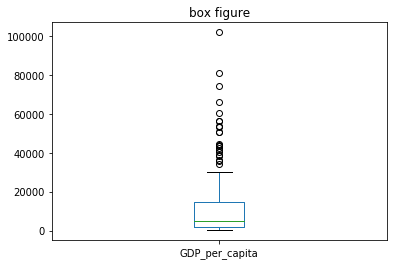

In [6]:
myData['GDP_per_capita'].plot.box(title='box figure')

### 绘制每个大洲的国家个数条形图

In [7]:
country_num=myData['Country'].groupby(myData['Continent']).count()
country_num

Continent
Africa           48
Asia             36
Europe           41
North America    19
Oceania           9
South America    11
Name: Country, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

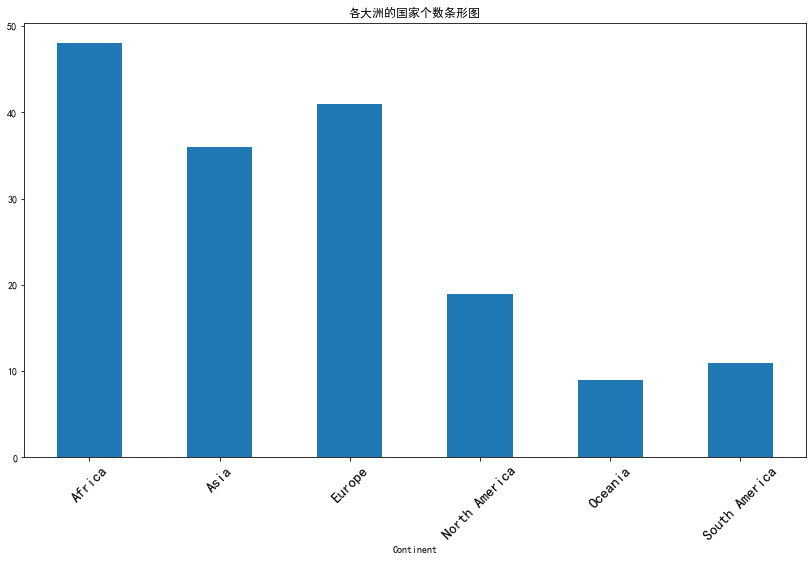

In [8]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
country_num.plot(kind='bar',title='各大洲的国家个数条形图',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

### 绘制各大洲国家数量占比的饼图

Text(0.5, 1.0, '各大洲国家数量占比的饼图')

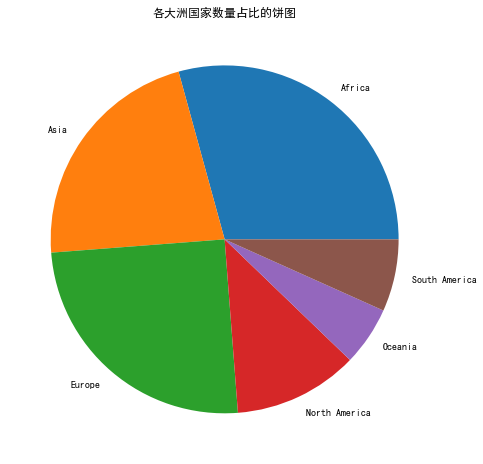

In [9]:
plt.figure(figsize=(16, 8))
plt.pie(country_num,labels=country_num.index)
plt.title('各大洲国家数量占比的饼图')

### 绘制人均寿命和人均GDP的关系（散点）

<function matplotlib.pyplot.show(*args, **kw)>

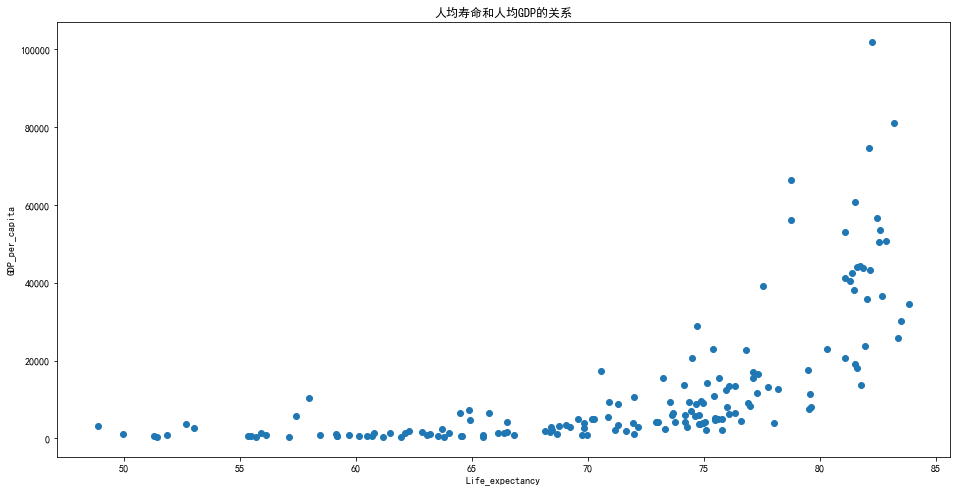

In [10]:
plt.figure(figsize=(16, 8))
plt.scatter(myData['Life_expectancy'],myData['GDP_per_capita'])
plt.xlabel('Life_expectancy')
plt.ylabel('GDP_per_capita')
plt.title('人均寿命和人均GDP的关系')
plt.show

### 人均GDP与人均寿命的气泡图（数据点大小，正比于人口数，给不同洲的国家设置不同的颜色）

In [17]:
myData.reset_index(drop=True, inplace=True)
#myData.insert(5,'Continent_num','')
myData.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population,Continent_num
0,Algeria,Africa,75.042537,4132.760292,39871528.0,1
1,Angola,Africa,52.666098,3695.793748,27859305.0,1
2,Benin,Africa,59.720707,783.947091,10575952.0,1
3,Botswana,Africa,64.487415,6532.060501,2209197.0,1
4,Burundi,Africa,57.107049,303.681022,10199270.0,1


In [28]:
for i in range(164):
    if myData.loc[i,'Continent']=='Africa':
        myData.loc[i,'Continent_num']=1
    elif myData.loc[i,'Continent']=='Asia':
        myData.loc[i,'Continent_num']=2
    elif myData.loc[i,'Continent']=='Europe':
        myData.loc[i,'Continent_num']=3
    elif myData.loc[i,'Continent']=='North America':
        myData.loc[i,'Continent_num']=4
    elif myData.loc[i,'Continent']=='Oceania':
        myData.loc[i,'Continent_num']=5
    else:
        myData.loc[i,'Continent_num']=6

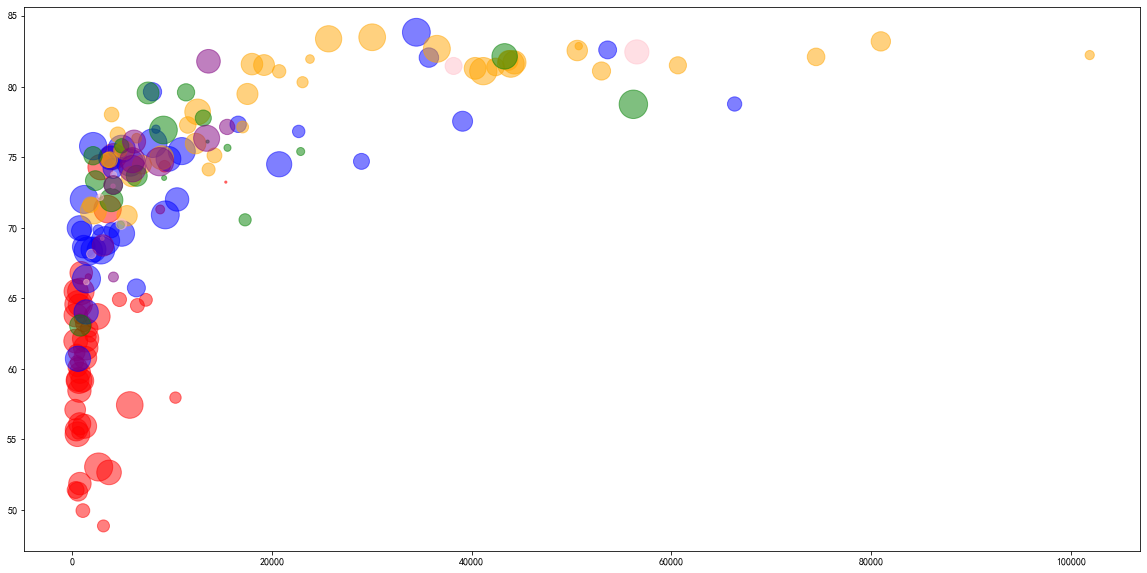

In [33]:
size=myData['Population'].rank()
size.dropna()
n=5
color={1:'red',2:'blue',3:'orange',4:'green',5:'pink',6:'purple'}
plt.figure(figsize=(20, 10))
plt.scatter(myData['GDP_per_capita'],myData['Life_expectancy'],color=[color[i] for i in myData['Continent_num']],
            s=size*n,alpha=0.5)

### Scipy解方程

### ①	求解f(x)=2*sin(x)-x+1

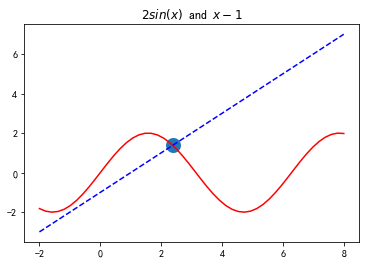

In [42]:
from scipy.integrate import odeint
import numpy as np
from scipy.optimize import root,fsolve

rangex1 = np.linspace(-2,8)
rangey1_1,rangey1_2 = 2*np.sin(rangex1),rangex1-1
plt.figure(1)
plt.plot(rangex1,rangey1_1,'r',rangex1,rangey1_2,'b--')
plt.title('$2sin(x)$ and $x-1$')

def f1(x):
    return np.sin(x)*2-x+1

sol1_root = root(f1,[2])
sol1_fsolve = fsolve(f1,[2])
plt.scatter(sol1_fsolve,2*np.sin(sol1_fsolve),linewidths=9)
plt.show()

### ②	求解线性方程组{3X1+2X2=3;X1-2X2=5}

In [43]:
def f2(x):
    return np.array([3*x[0]+2*x[1]-3,x[0]-2*x[1]-5])

sol2_root = root(f2,[0,0])
sol2_fsolve = fsolve(f2,[0,0])
print(sol2_fsolve) # [2. -1.5]

a = np.array([[3,2],[1,-2]])
b = np.array([3,5])
x = np.linalg.solve(a,b)
print(x)

[ 2.  -1.5]
[ 2.  -1.5]
